In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read csv file
raw_data = pd.read_csv("data_set/archive/BTC-USD.csv")

In [4]:
# shof info, describe and head values
raw_data.head()

,timestamp,adjclose,open,high,volume,low,close
0,2014-09-17 00:00:00,457.334015,465.864014,468.174011,21056800,452.421997,457.334015
1,2014-09-18 00:00:00,424.440002,456.859985,456.859985,34483200,413.104004,424.440002
2,2014-09-19 00:00:00,394.795990,424.102997,427.834991,37919700,384.532013,394.795990
3,2014-09-20 00:00:00,408.903992,394.673004,423.295990,36863600,389.882996,408.903992
4,2014-09-21 00:00:00,398.821014,408.084991,412.425995,26580100,393.181000,398.821014


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934 entries, 0 to 2933
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  2934 non-null   object 
 1   adjclose   2934 non-null   float64
 2   open       2934 non-null   float64
 3   high       2934 non-null   float64
 4   volume     2934 non-null   int64  
 5   low        2934 non-null   float64
 6   close      2934 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 160.6+ KB


In [9]:
raw_data.describe()

,adjclose,open,high,volume,low,close
count,2934.000000,2934.000000,2934.000000,2.934000e+03,2934.000000,2934.000000
mean,12694.057729,12689.379011,13016.407056,1.591078e+10,12323.659329,12694.057729
std,16412.491602,16417.279056,16839.714000,1.988675e+10,15928.187362,16412.491602
min,178.102997,176.897003,211.731003,5.914570e+06,171.509995,178.102997
25%,655.104004,655.102737,662.953979,9.245587e+07,646.049026,655.104004
50%,6747.435059,6741.020020,6884.027100,6.485752e+09,6602.629883,6747.435059
75%,13763.277344,13716.327881,14192.125000,2.738929e+10,13128.623779,13763.277344
max,67566.828125,67549.734375,68789.625000,3.509679e+11,66382.062500,67566.828125


In [10]:
# close value will be y, and timestamp will be index

In [13]:
# to time
raw_data.timestamp

# raw data index config
raw_data.index = pd.to_datetime(raw_data.timestamp)

In [14]:
raw_data.index

DatetimeIndex(['2014-09-17 00:00:00', '2014-09-18 00:00:00',
               '2014-09-19 00:00:00', '2014-09-20 00:00:00',
               '2014-09-21 00:00:00', '2014-09-22 00:00:00',
               '2014-09-23 00:00:00', '2014-09-24 00:00:00',
               '2014-09-25 00:00:00', '2014-09-26 00:00:00',
               ...
               '2022-09-19 00:00:00', '2022-09-20 00:00:00',
               '2022-09-21 00:00:00', '2022-09-22 00:00:00',
               '2022-09-23 00:00:00', '2022-09-24 00:00:00',
               '2022-09-25 00:00:00', '2022-09-26 00:00:00',
               '2022-09-27 00:00:00', '2022-09-28 08:55:00'],
              dtype='datetime64[ns]', name='timestamp', length=2934, freq=None)

In [15]:
raw_data

,timestamp,adjclose,open,high,volume,low,close
timestamp,,,,,,,
2014-09-17 00:00:00,2014-09-17 00:00:00,457.334015,465.864014,468.174011,21056800,452.421997,457.334015
2014-09-18 00:00:00,2014-09-18 00:00:00,424.440002,456.859985,456.859985,34483200,413.104004,424.440002
2014-09-19 00:00:00,2014-09-19 00:00:00,394.795990,424.102997,427.834991,37919700,384.532013,394.795990
2014-09-20 00:00:00,2014-09-20 00:00:00,408.903992,394.673004,423.295990,36863600,389.882996,408.903992
2014-09-21 00:00:00,2014-09-21 00:00:00,398.821014,408.084991,412.425995,26580100,393.181000,398.821014
...,...,...,...,...,...,...,...
2022-09-24 00:00:00,2022-09-24 00:00:00,18937.011719,19296.990234,19310.197266,26149643168,18861.974609,18937.011719
2022-09-25 00:00:00,2022-09-25 00:00:00,18802.097656,18936.310547,19134.732422,23359966112,18696.468750,18802.097656
2022-09-26 00:00:00,2022-09-26 00:00:00,19222.671875,18803.900391,19274.873047,44148798321,18721.285156,19222.671875


In [16]:
# remove timestamp col
raw_data.drop(columns=["timestamp"], inplace=True)

In [17]:
# show raw data
raw_data.head()

,adjclose,open,high,volume,low,close
timestamp,,,,,,
2014-09-17,457.334015,465.864014,468.174011,21056800,452.421997,457.334015
2014-09-18,424.440002,456.859985,456.859985,34483200,413.104004,424.440002
2014-09-19,394.795990,424.102997,427.834991,37919700,384.532013,394.795990
2014-09-20,408.903992,394.673004,423.295990,36863600,389.882996,408.903992
2014-09-21,398.821014,408.084991,412.425995,26580100,393.181000,398.821014


In [18]:
# copy the data and process it
process_data = raw_data.copy()

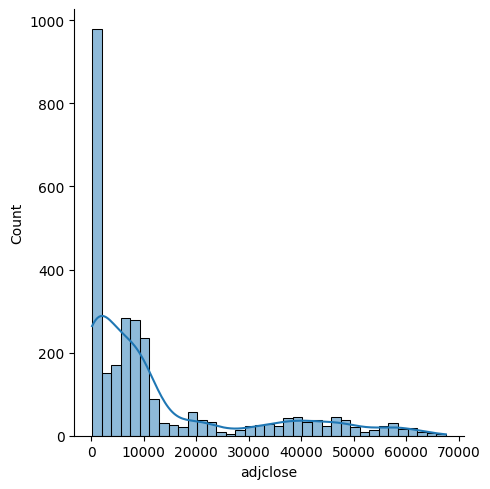

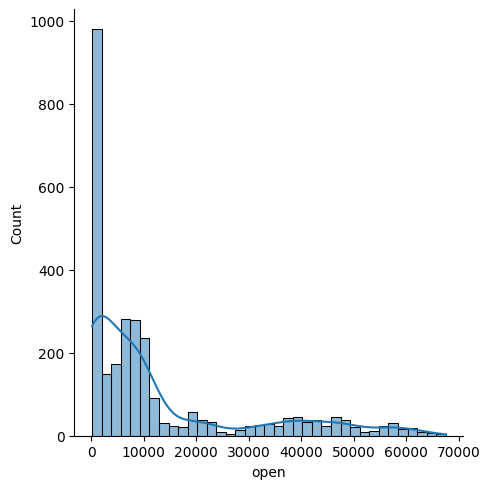

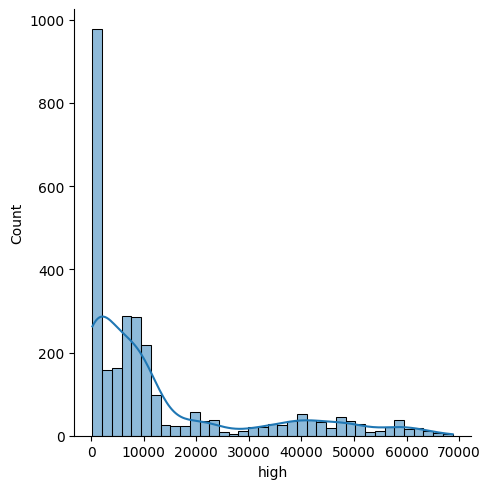

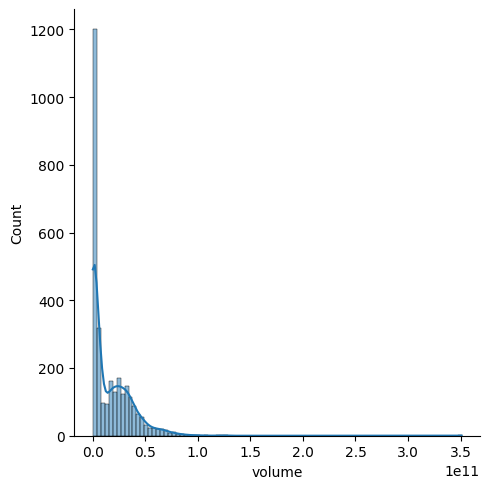

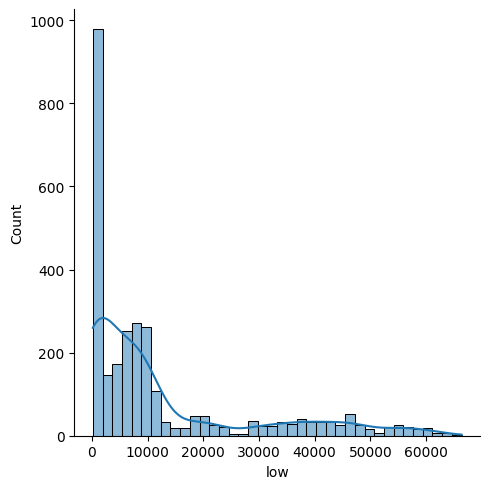

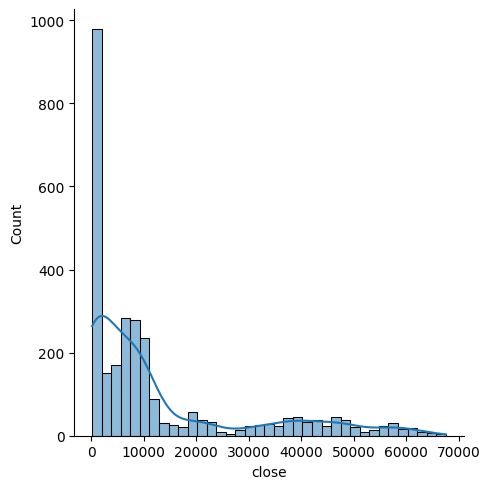

In [34]:
# EDA
# displot
for i in process_data.columns:
    sns.displot(x=eval(f"process_data.{i}"), kde=True)
    plt.show()

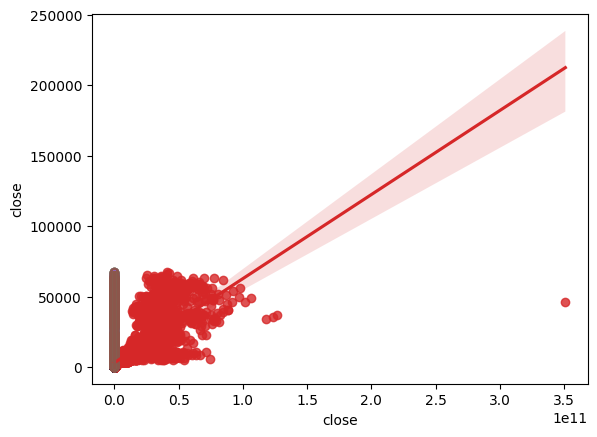

In [36]:
# reg plot
for i in process_data.columns:
    sns.regplot(x=i, y="close", data=process_data)
    plt.plot()

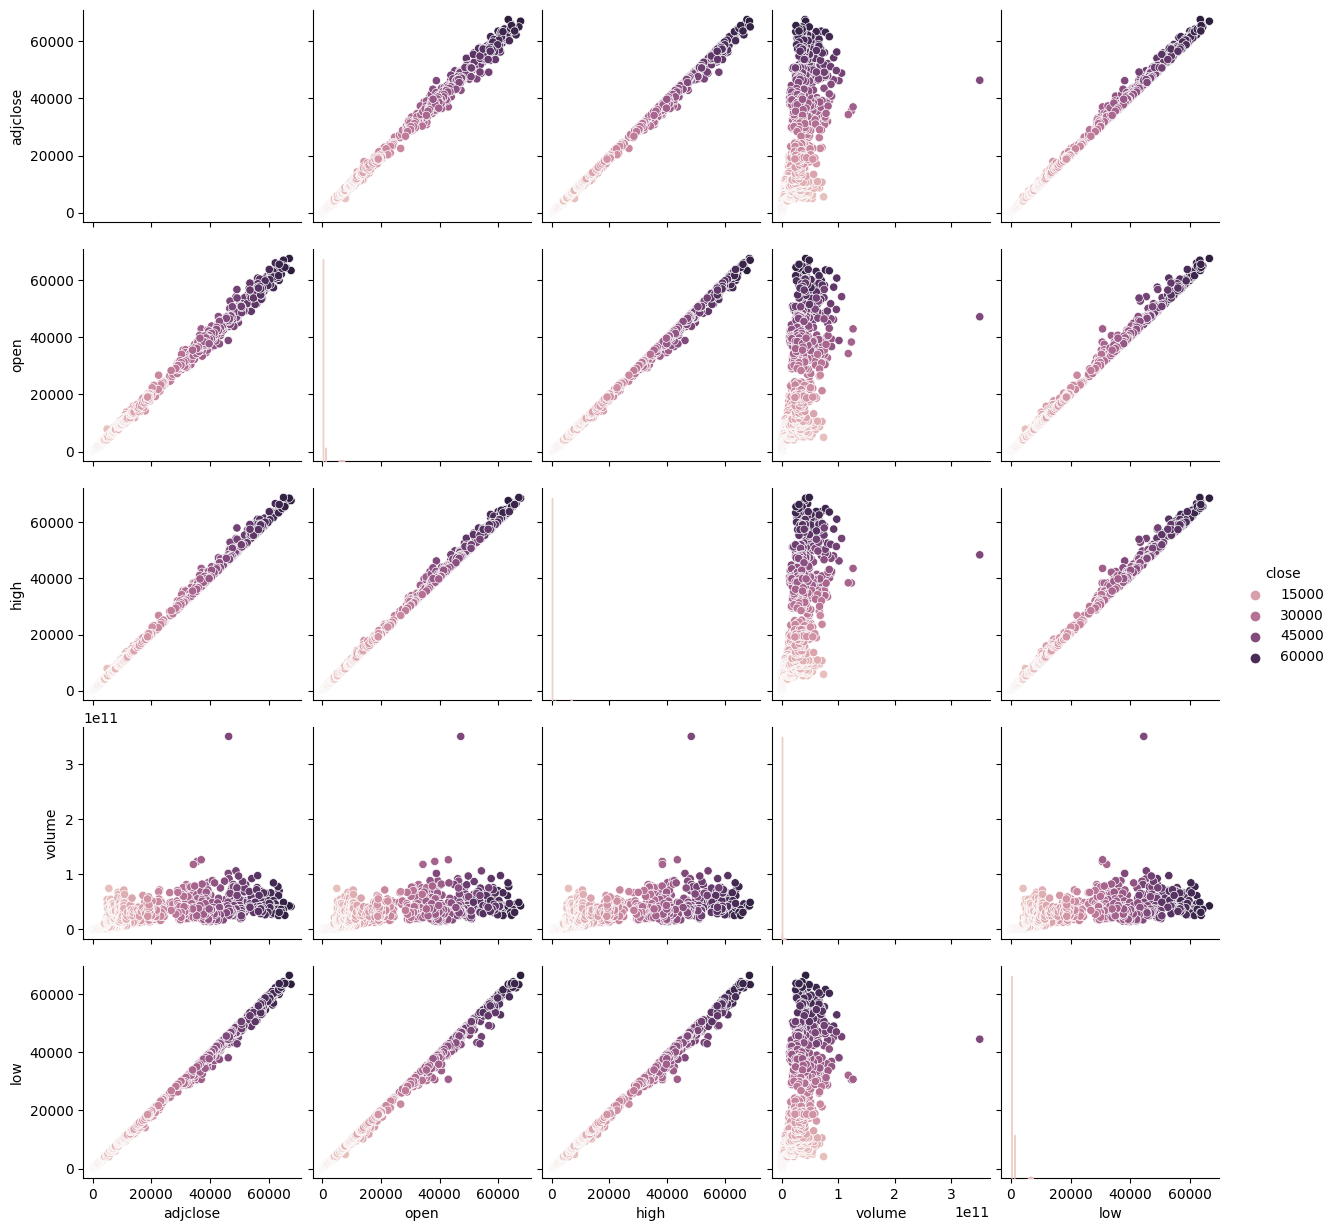

In [33]:
# pairplot
sns.pairplot(data=process_data, hue="close")
plt.show()

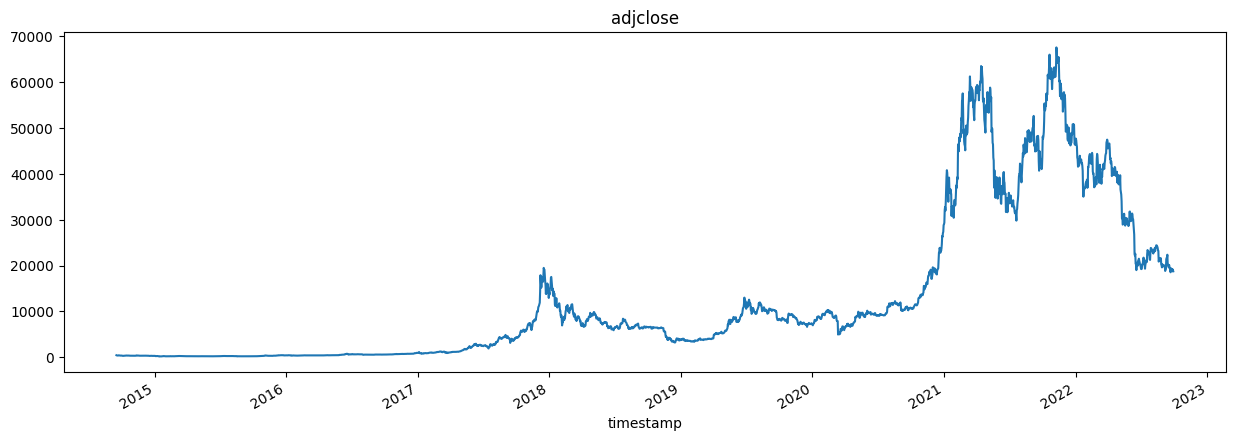

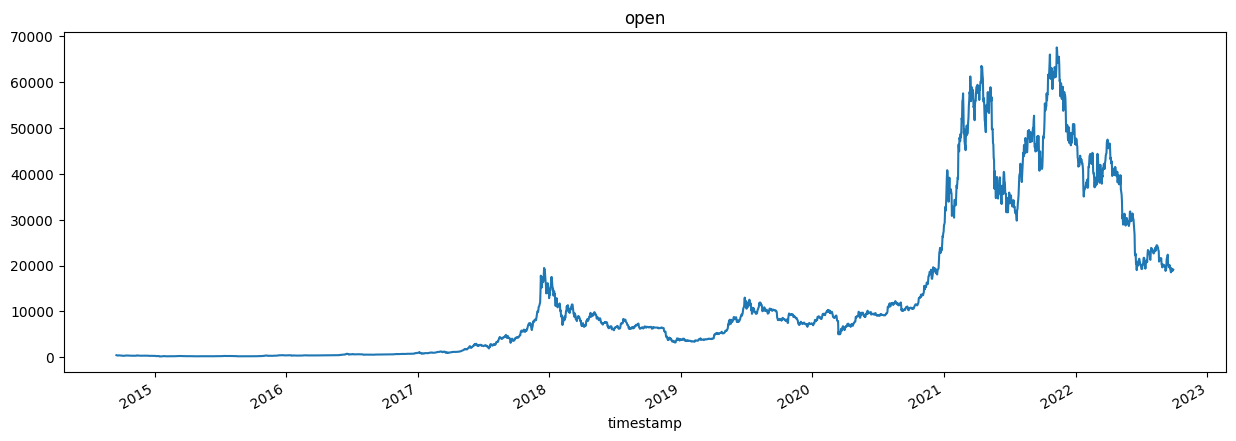

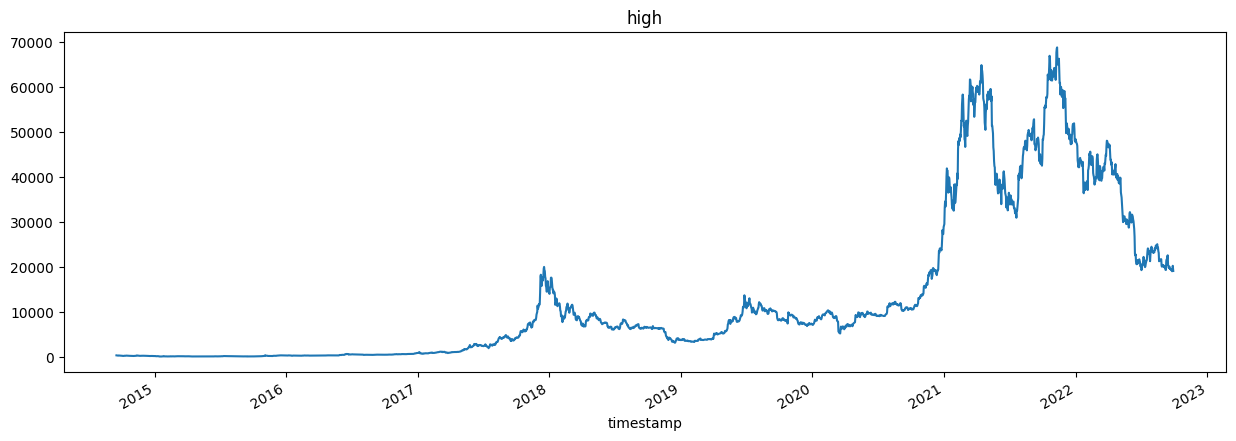

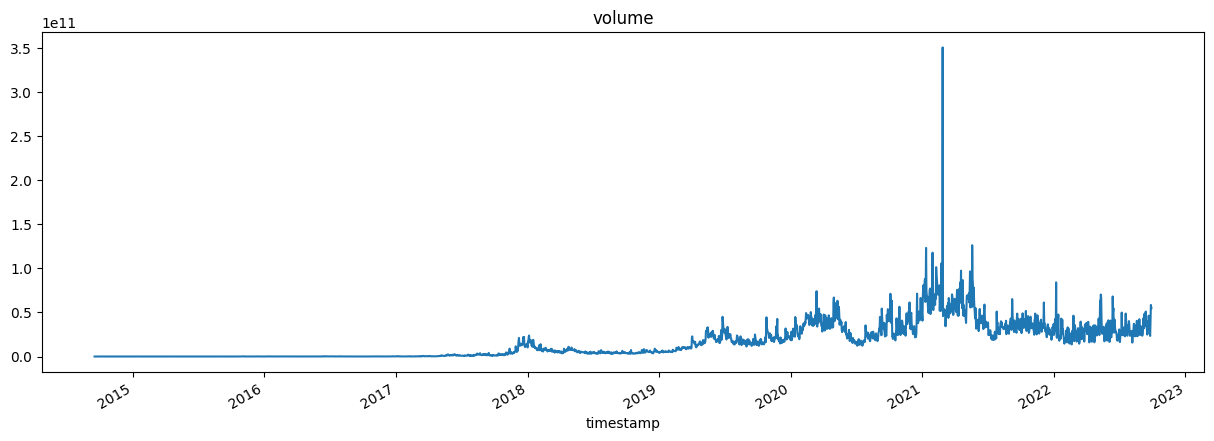

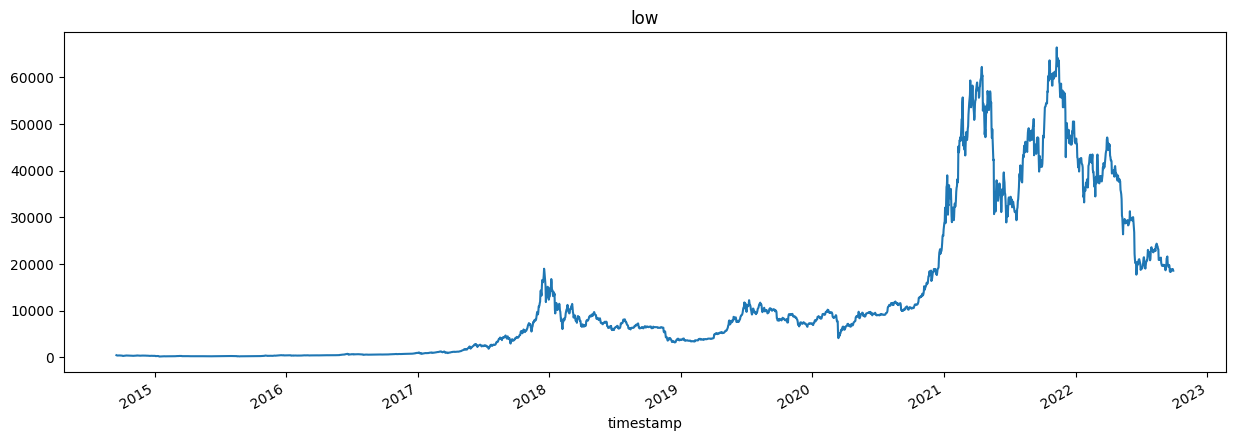

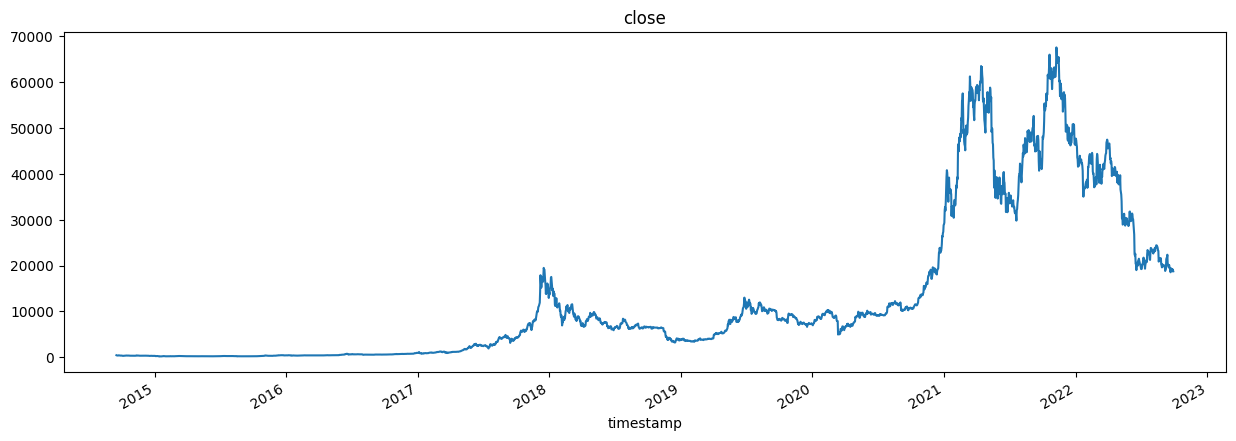

In [43]:
# plotting all cols
for i in process_data.columns:
    eval(f"process_data.{i}.plot(style='-', figsize=(15, 5), title='{i}')")
    plt.show()

In [59]:
# time stamp
process_data['zaman_damgasi'] = (process_data.index - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [60]:
# min max scaler to time stamp
scaler = MinMaxScaler()
scale_cols= ["zaman_damgasi"]
process_data[scale_cols] = scaler.fit_transform(process_data[scale_cols])

In [61]:
process_data

,adjclose,open,high,volume,low,close,zaman_damgasi
timestamp,,,,,,,
2014-09-17 00:00:00,457.334015,465.864014,468.174011,21056800,452.421997,457.334015,0.000000
2014-09-18 00:00:00,424.440002,456.859985,456.859985,34483200,413.104004,424.440002,0.000341
2014-09-19 00:00:00,394.795990,424.102997,427.834991,37919700,384.532013,394.795990,0.000682
2014-09-20 00:00:00,408.903992,394.673004,423.295990,36863600,389.882996,408.903992,0.001023
2014-09-21 00:00:00,398.821014,408.084991,412.425995,26580100,393.181000,398.821014,0.001364
...,...,...,...,...,...,...,...
2022-09-24 00:00:00,18937.011719,19296.990234,19310.197266,26149643168,18861.974609,18937.011719,0.998510
2022-09-25 00:00:00,18802.097656,18936.310547,19134.732422,23359966112,18696.468750,18802.097656,0.998851
2022-09-26 00:00:00,19222.671875,18803.900391,19274.873047,44148798321,18721.285156,19222.671875,0.999192


In [63]:
# train test split
X = process_data.zaman_damgasi.values.reshape(-1, 1)
y = process_data.close.values.reshape(-1, 1)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
print("train shapes", X_train.shape, y_train.shape)

train shapes (2347, 1) (2347, 1)


In [ ]:
# grid searcher function
def grid_searcher(method, params):
    search = GridSearchCV(method, 
                         cv=5,
                         param_grid=params,
                         n_jobs=4)

    search.fit(X_train, y_train)

    print(search.best_params_, search.best_score_)

In [67]:
# linear reg
lr = LinearRegression()
lr.fit(X_train, y_train)
predict = lr.predict(X_test)

# scores
mse = mean_squared_error(y_test, predict)
r2 = r2_score(y_test, predict)
rmse = mse**0.5
print(f" mse: {mse}\n r2: {r2}\n rmse: {rmse}")

 mse: 96517388.15909088
 r2: 0.6349920423782501
 rmse: 9824.326346324764


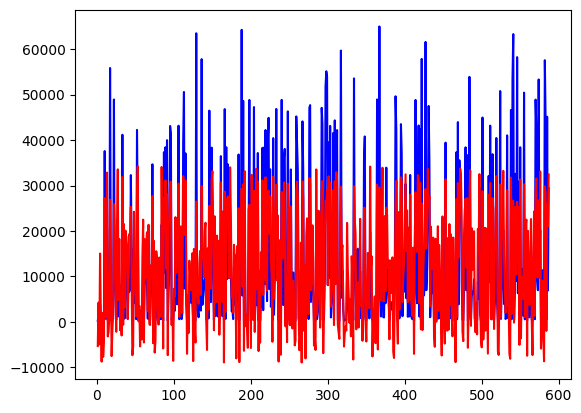

In [70]:
r = range(1, len(predict)+1)
plt.plot(r, y_test, color="b")
plt.plot(r, predict, color="r")
plt.show()

In [76]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)
predict_2 = knn.predict(X_test)
mse = mean_squared_error(y_test, predict_2)
r2 = r2_score(y_test, predict_2)
rmse = mse**0.5
print(f" mse: {mse}\n r2: {r2}\n rmse: {rmse}")

 mse: 381623.07418037805
 r2: 0.9985567837925917
 rmse: 617.7564845312254


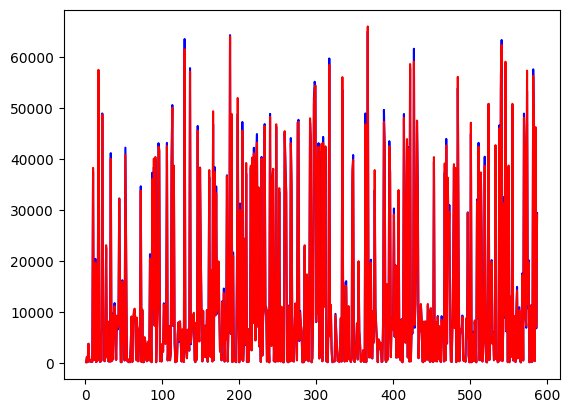

In [77]:
# plotting
r = range(1, len(predict_2)+1)
plt.plot(r, y_test, color="b")
plt.plot(r, predict_2, color="r")
plt.show()


 mse: 96518801.53763683
 r2: 0.6349866972852442
 rmse: 9824.398278654873


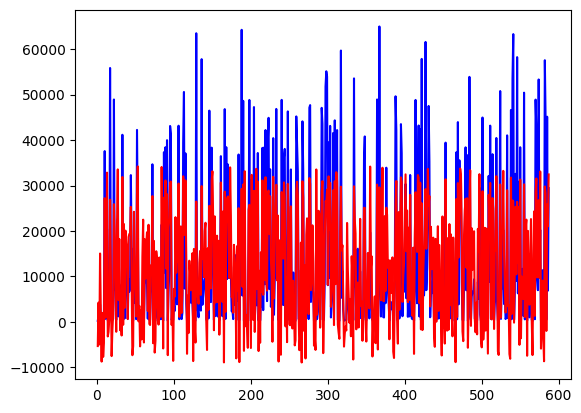

In [86]:
# overfit problem
lasso = Lasso(alpha=0.6)
lasso.fit(X_train, y_train)
predict_3 = lasso.predict(X_test)
mse = mean_squared_error(y_test, predict_3)
r2 = r2_score(y_test, predict_3)
rmse = mse**0.5
print(f" mse: {mse}\n r2: {r2}\n rmse: {rmse}")

# plotting
r = range(1, len(predict_3)+1)
plt.plot(r, y_test, color="b")
plt.plot(r, predict_3, color="r")
plt.show()

 mse: 96544891.35914831
 r2: 0.6348880312039684
 rmse: 9825.725996543375


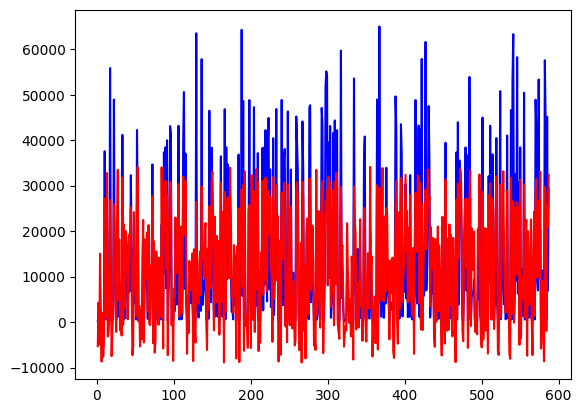

In [87]:
# overfit problem2
ridge = Ridge(alpha=0.6)
ridge.fit(X_train, y_train)
predict_4 = ridge.predict(X_test)
mse = mean_squared_error(y_test, predict_4)
r2 = r2_score(y_test, predict_4)
rmse = mse**0.5
print(f" mse: {mse}\n r2: {r2}\n rmse: {rmse}")

# plotting
r = range(1, len(predict_4)+1)
plt.plot(r, y_test, color="b")
plt.plot(r, predict_4, color="r")
plt.show()

 mse: 517682.43325384246
 r2: 0.9980422366242735
 rmse: 719.5015172005146


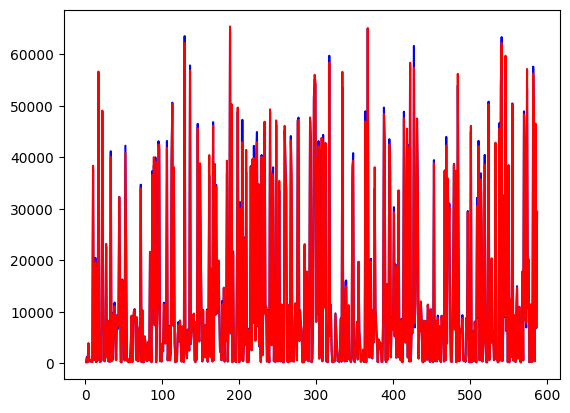

In [102]:
xgb = XGBRegressor(n_estimators=141, max_depth=5, n_jobs=4, random_state=0)
xgb.fit(X_train, y_train)
predict_5 = xgb.predict(X_test)
mse = mean_squared_error(y_test, predict_5)
r2 = r2_score(y_test, predict_5)
rmse = mse**0.5
print(f" mse: {mse}\n r2: {r2}\n rmse: {rmse}")

# plotting
r = range(1, len(predict_5)+1)
plt.plot(r, y_test, color="b")
plt.plot(r, predict_5, color="r")
plt.show()

 mse: 31967635.378383365
 r2: 0.8791052936469099
 rmse: 5653.992870386676


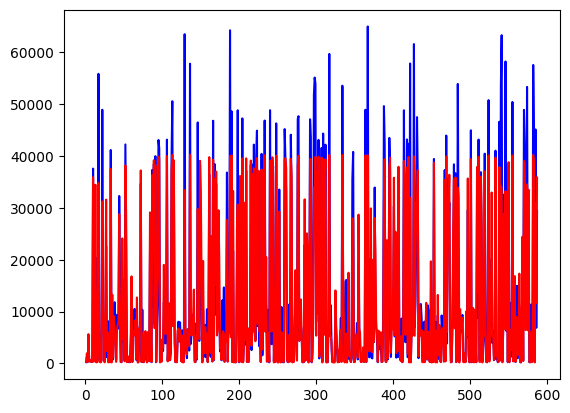

In [119]:
svr = SVR(C=2000, kernel="rbf", gamma="scale")
svr.fit(X_train, y_train)
predict_6 = svr.predict(X_test)
mse = mean_squared_error(y_test, predict_6)
r2 = r2_score(y_test, predict_6)
rmse = mse**0.5
print(f" mse: {mse}\n r2: {r2}\n rmse: {rmse}")

# plotting
r = range(1, len(predict_6)+1)
plt.plot(r, y_test, color="b")
plt.plot(r, predict_6, color="r")


 mse: 5624793.461907913
 r2: 0.9787282435555442
 rmse: 2371.6647026736123


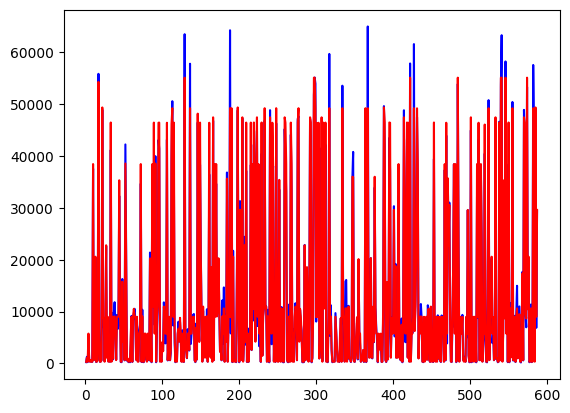

In [117]:
# random forest
rf = RandomForestRegressor(n_estimators=100, max_depth=5, max_features="sqrt")
rf.fit(X_train, y_train)
predict_7 = rf.predict(X_test)

mse = mean_squared_error(y_test, predict_7)
r2 = r2_score(y_test, predict_7)
rmse = mse**0.5
print(f" mse: {mse}\n r2: {r2}\n rmse: {rmse}")

# plotting
r = range(1, len(predict_7)+1)
plt.plot(r, y_test, color="b")
plt.plot(r, predict_7, color="r")